# 1. Importing data and libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

%matplotlib inline

In [35]:
# Create a path
path = r'/Users/marcela/Library/CloudStorage/OneDrive-Pessoal/CF/Machine Learning/Achievement/Data Sets'

In [36]:
# Delimiting columns displayed
pd.options.display.max_columns = None

In [37]:
# Import pleasant weather answers data set
df_pleasant_weather = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [38]:
# Import X_cleaned.pkl
X = pd.read_pickle(os.path.join(path, 'X_cleaned.pkl'))

In [39]:
df_pleasant_weather.shape

(22950, 16)

In [40]:
X.shape

(22950, 135)

In [41]:
X.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.0304,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,6,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.0292,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0.00,0.6,2.7,1.7,5.3,6,0.92,1.0165,0.28,0.0

# 2. Data Wrangling

In [42]:
keep = list(x for x in X.columns if not x.find('HEATHROW') >=0)
# Create a list of the data that doesn't contain the weather station name above
keep.sort()
keep

['BASEL_cloud_cover',
 'BASEL_global_radiation',
 'BASEL_humidity',
 'BASEL_precipitation',
 'BASEL_pressure',
 'BASEL_sunshine',
 'BASEL_temp_max',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BELGRADE_cloud_cover',
 'BELGRADE_global_radiation',
 'BELGRADE_humidity',
 'BELGRADE_precipitation',
 'BELGRADE_pressure',
 'BELGRADE_sunshine',
 'BELGRADE_temp_max',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_global_radiation',
 'BUDAPEST_humidity',
 'BUDAPEST_precipitation',
 'BUDAPEST_pressure',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_max',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'DEBILT_cloud_cover',
 'DEBILT_global_radiation',
 'DEBILT_humidity',
 'DEBILT_precipitation',
 'DEBILT_pressure',
 'DEBILT_sunshine',
 'DEBILT_temp_max',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_humidity',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_pressure',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_max',
 

In [43]:
# Create an 'X' matrix by dropping the unneeded columns. One weather station, full time period.
X2 = X.drop(keep, axis=1)
# y = df_keyyear.drop(['DATE'], axis=1)
X2

,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max
0,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3
1,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6
2,8,0.96,1.0166,0.15,0.07,0.1,8.4,6.1,12.2
3,8,0.98,1.0230,0.13,0.00,0.0,9.4,6.7,8.9
4,5,0.84,1.0275,0.30,0.00,2.1,8.9,8.9,7.2
...,...,...,...,...,...,...,...,...,...
22945,5,0.87,1.0140,1.18,0.16,1.9,16.4,11.9,18.9
22946,4,0.82,1.0152,1.18,0.16,4.2,15.8,12.7,21.8
22947,7,0.85,1.0138,1.18,0.16,4.2,16.5,11.2,17.0
22948,5,0.86,1.0147,1.18,0.16,0.6,15.2,13.4,17.5


In [44]:
y2 = df_pleasant_weather['HEATHROW_pleasant_weather']
y2

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: HEATHROW_pleasant_weather, Length: 22950, dtype: int64

In [45]:
X2.shape

(22950, 9)

In [46]:
y2.shape

(22950,)

In [47]:
# Turning X2 and y2 from a df to arrays (X and y)
X = np.array(X2)
y = np.array(y2)

In [48]:
# Verifying array shape
X

array([[ 7.    ,  0.91  ,  1.001 , ..., 10.6   ,  9.4   ,  8.3   ],
       [ 7.    ,  0.98  ,  1.0051, ...,  6.1   ,  3.9   , 10.6   ],
       [ 8.    ,  0.96  ,  1.0166, ...,  8.4   ,  6.1   , 12.2   ],
       ...,
       [ 7.    ,  0.85  ,  1.0138, ..., 16.5   , 11.2   , 17.    ],
       [ 5.    ,  0.86  ,  1.0147, ..., 15.2   , 13.4   , 17.5   ],
       [ 5.    ,  0.89  ,  1.0107, ..., 13.7   ,  9.8   , 17.6   ]])

In [49]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.20, random_state = 38)

In [51]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


In [52]:
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [53]:
X_train

array([[ 5.    ,  0.75  ,  1.0119, ..., 12.1   ,  8.8   , 15.2   ],
       [ 7.    ,  0.6   ,  1.0147, ..., 14.9   ,  9.9   , 18.8   ],
       [ 8.    ,  0.9   ,  1.0065, ...,  2.1   , -0.9   ,  5.3   ],
       ...,
       [ 3.    ,  0.85  ,  1.0172, ..., -2.8   , -4.5   ,  0.9   ],
       [ 1.    ,  0.65  ,  1.0255, ..., 15.    ,  8.6   , 21.2   ],
       [ 7.    ,  0.75  ,  1.0251, ...,  8.    ,  5.    , 12.2   ]])

In [54]:
X_test

array([[ 6.    ,  0.76  ,  1.015 , ...,  0.8   ,  0.    ,  2.6   ],
       [ 3.    ,  0.54  ,  1.0207, ...,  9.2   ,  2.3   , 13.3   ],
       [ 4.    ,  0.7   ,  1.0191, ...,  8.2   ,  3.4   , 13.4   ],
       ...,
       [ 7.    ,  0.83  ,  1.0249, ..., 10.6   ,  7.8   , 13.3   ],
       [ 5.    ,  0.69  ,  1.0092, ..., 18.4   , 14.    , 21.9   ],
       [ 4.    ,  0.59  ,  1.0272, ..., 10.    ,  5.5   , 16.6   ]])

In [55]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

# 3. Random Forest Model

In [56]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) #, max_depth = 5)  
  
# Training the model on the training dataset
# Fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
# Performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


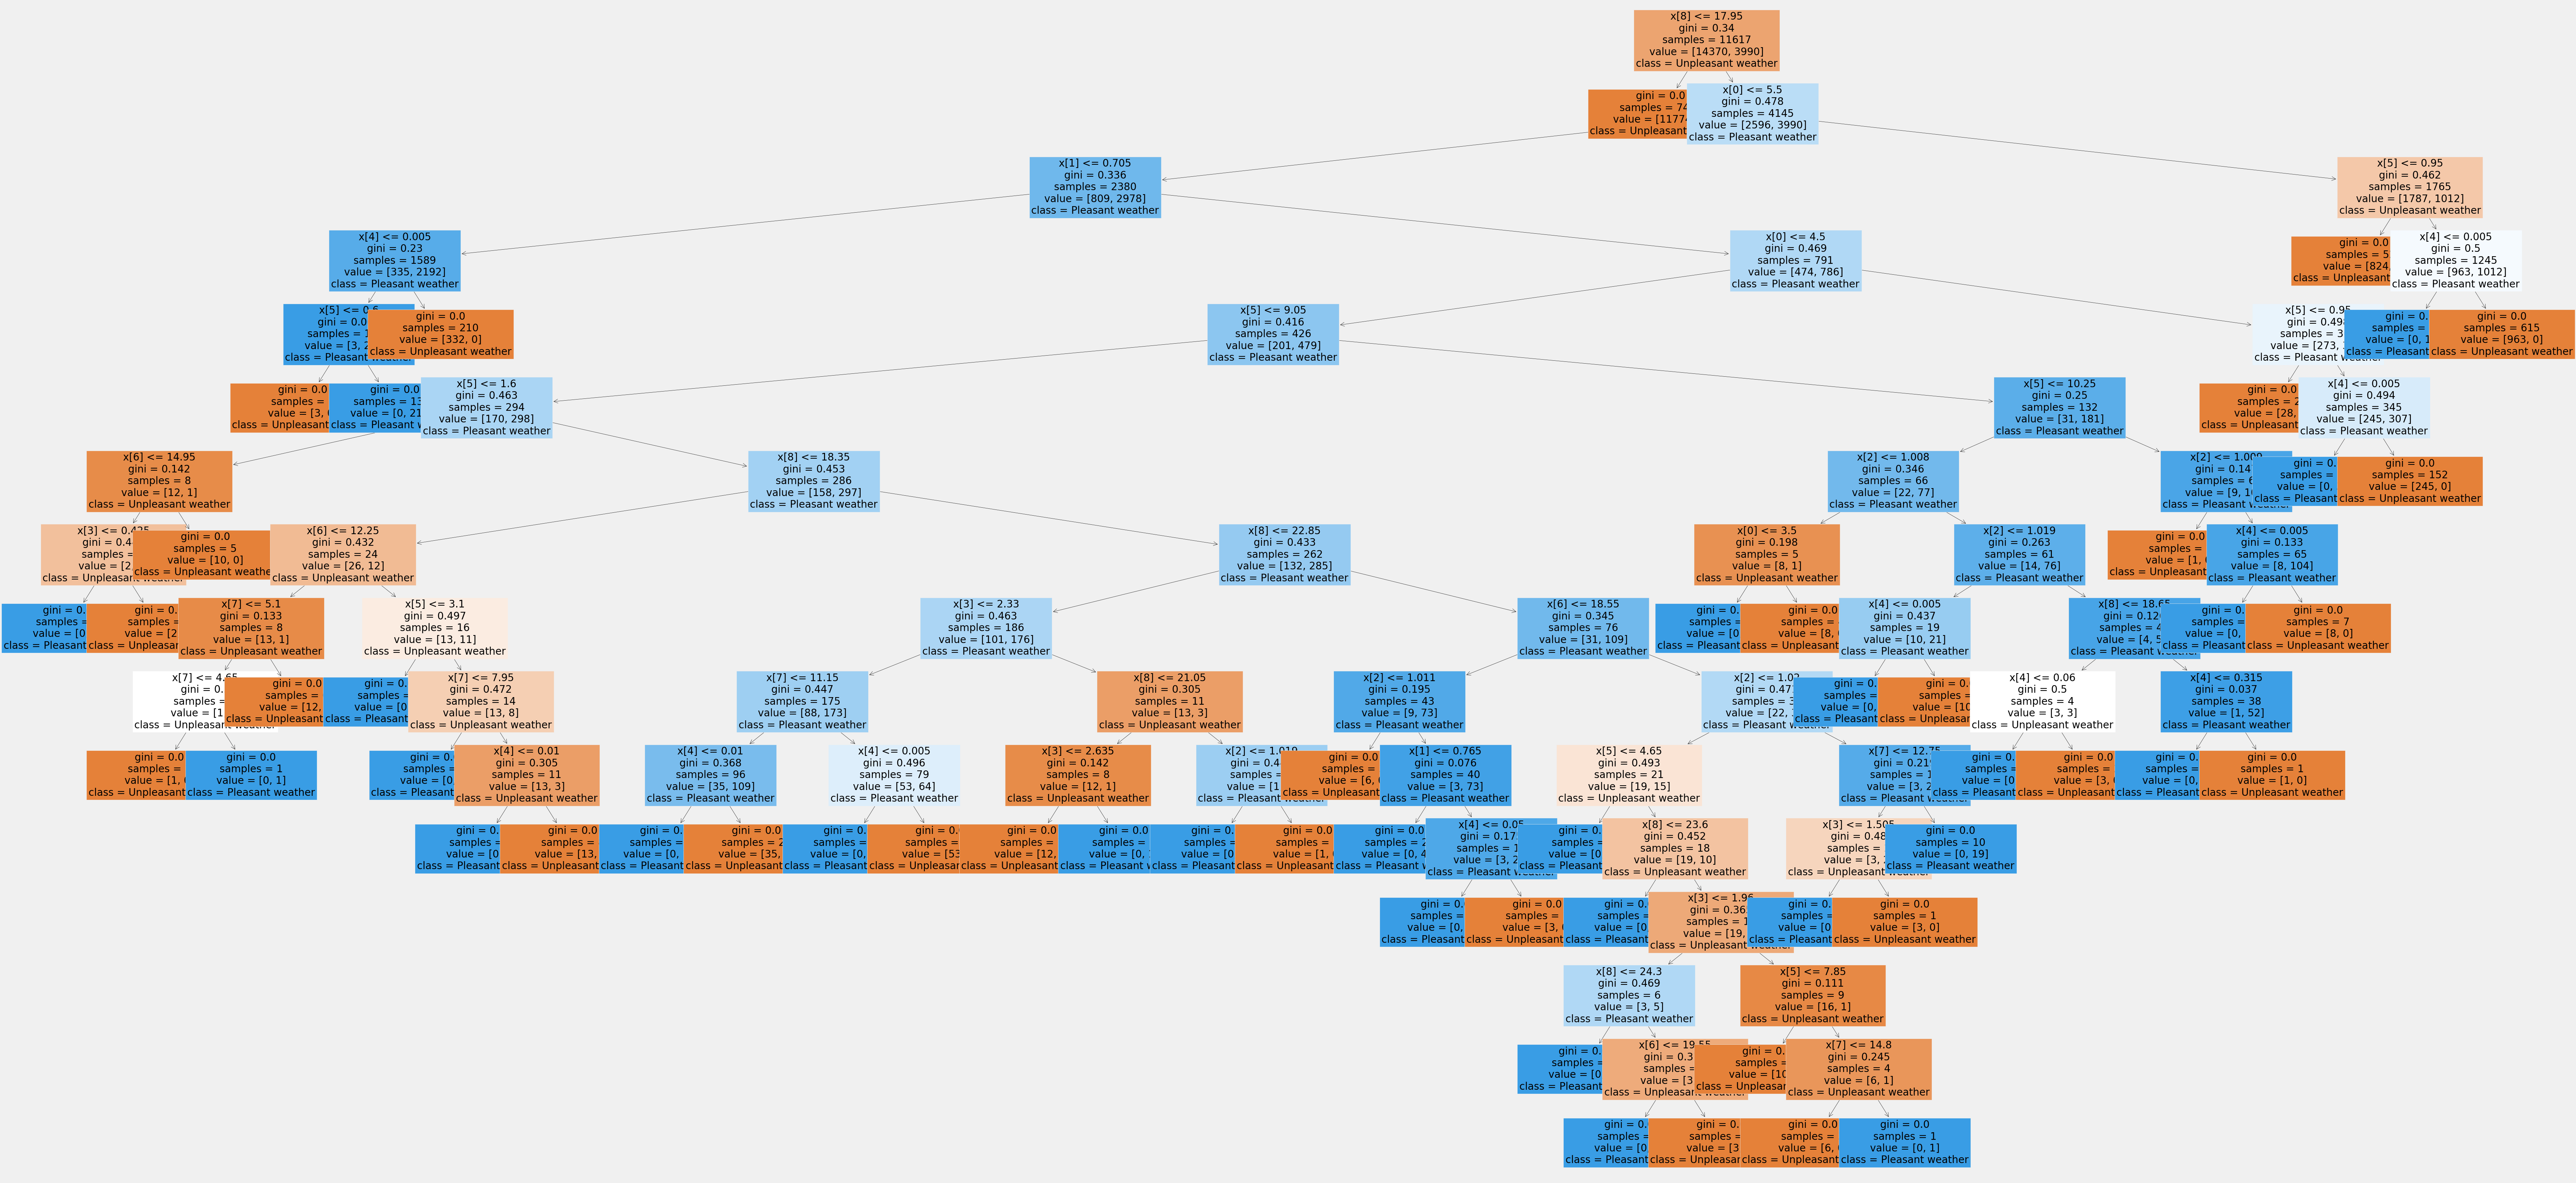

In [58]:
types = {0:'Unpleasant weather', 1:'Pleasant weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=types, filled=True);

# 4. Relative importance of factors

In [59]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
newarray

array([0.00937163, 0.03428557, 0.01654666, 0.07475565, 0.30897261,
       0.08911441, 0.11781019, 0.01339751, 0.33574579])

In [60]:
np.set_printoptions(threshold=1000)

In [61]:
station1 = list(x for x in X2.columns if x.find('HEATHROW') >=0)
station1

['HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max']

In [62]:
# Convert newarray to a Series with station1 as index
newarray = pd.Series(newarray, index=station1)
newarray.sort_values(ascending = False)

HEATHROW_temp_max            0.335746
HEATHROW_precipitation       0.308973
HEATHROW_temp_mean           0.117810
HEATHROW_sunshine            0.089114
HEATHROW_global_radiation    0.074756
HEATHROW_humidity            0.034286
HEATHROW_pressure            0.016547
HEATHROW_temp_min            0.013398
HEATHROW_cloud_cover         0.009372
dtype: float64

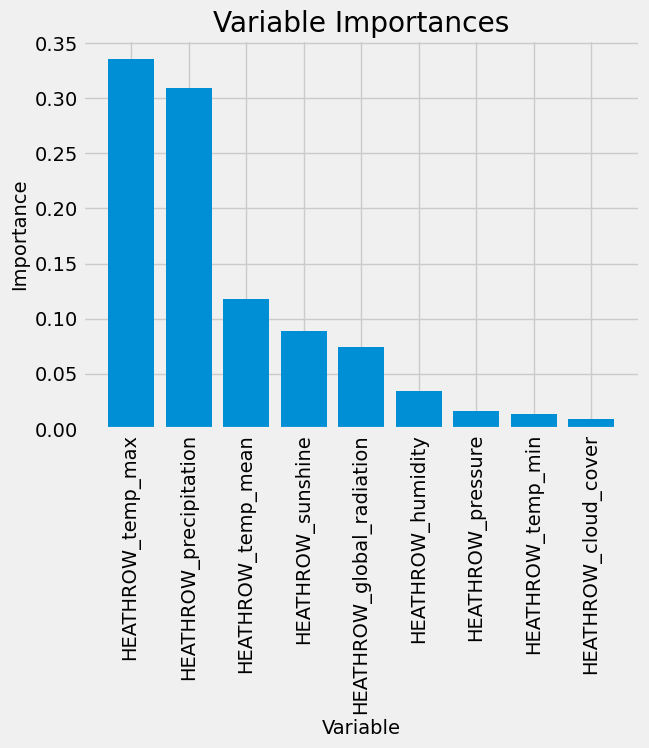

In [63]:
# Get indices sorted by descending importance
sorted_indices = newarray.sort_values(ascending=False).index

# Set style for the plot
plt.style.use('fivethirtyeight')

# List of x locations for plotting
x_values = list(range(len(newarray)))

# Convert sorted indices to a list for use in the plot
sorted_station1 = sorted_indices.tolist()

# Create the bar plot
plt.bar(x_values, newarray[sorted_station1], orientation='vertical')
plt.xticks(x_values, sorted_station1, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.show()